In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
apt_data_path = os.path.join(".", "data", "clean_app.csv")
house_data_path = os.path.join(".", "data", "clean_house.csv")

with open(apt_data_path, "r") as f:
    df_apt = pd.read_csv(f)

with open(house_data_path, "r") as f:
    df_house = pd.read_csv(f)


In [6]:
#what data do we have in each column?
print(df_apt.columns)
print(df_house.columns)

Index(['property_id', 'locality_name', 'postal_code', 'latitude', 'longitude',
       'property_type', 'property_subtype', 'price', 'type_of_sale',
       'number_of_rooms', 'living_area', 'kitchen_type',
       'fully_equipped_kitchen', 'furnished', 'open_fire', 'terrace',
       'terrace_area', 'garden', 'garden_area', 'surface_of_good',
       'number_of_facades', 'swimming_pool', 'state_of_building', 'main_city',
       'province'],
      dtype='object')
Index(['property_id', 'locality_name', 'postal_code', 'latitude', 'longitude',
       'property_type', 'property_subtype', 'price', 'type_of_sale',
       'number_of_rooms', 'living_area', 'kitchen_type',
       'fully_equipped_kitchen', 'furnished', 'open_fire', 'terrace',
       'terrace_area', 'garden', 'garden_area', 'surface_of_good',
       'number_of_facades', 'swimming_pool', 'state_of_building', 'main_city',
       'province'],
      dtype='object')


In [7]:
#"PUBLIC_SALE" and "LIFE_ANNUITY" are very rare types of sale
index_type_of_sale = df_apt[(df_apt["type_of_sale"] == "PUBLIC_SALE")| (df_apt["type_of_sale"] == "LIFE_ANNUITY")].index
df_apt.drop(index_type_of_sale, inplace=True)


In [42]:
types = df_apt["kitchen_type"].unique()
print(types)

mean_prices = df_apt.groupby("kitchen_type")["price"].mean()
sorted_mean_prices = mean_prices.sort_values()
#print(sorted_mean_prices)
median_prices = df_apt.groupby("kitchen_type")["price"].median()
sorted_median_prices = median_prices.sort_values()
#print(sorted_median_prices)

df_apt.replace({"kitchen_type":"USA_UNINSTALLED"}, 'USA_HYPER_EQUIPPED', inplace= True) #checked the properties manually, looks like an input error




['NOT_INSTALLED' 'USA_SEMI_EQUIPPED' 'INSTALLED' nan 'SEMI_EQUIPPED'
 'HYPER_EQUIPPED' 'USA_INSTALLED' 'USA_HYPER_EQUIPPED']


In [45]:
categories = ['locality_name', 'property_type', 'property_subtype', 'price', 'type_of_sale', 'kitchen_type', 'fully_equipped_kitchen', 'furnished', 'open_fire', 'terrace', 'terrace_area', 'garden', 'garden_area', 'surface_of_good','number_of_facades', 'swimming_pool', 'state_of_building', 'main_city', 'province']


In [46]:

for cat in categories:
    print(f"The unique values of the {cat} are: ", df_apt[cat].unique() , "number of unique values is: ", df_apt[cat].nunique() )

The unique values of the locality_name are:  ['sint-joost-ten-node' 'elsene' 'brussel' 'de haan' 'vorselaar' 'waver'
 'nijvel' 'knokke' 'knokke-zoute' 'kessel' 'anderlecht' 'oostende' 'gent'
 'knokke-heist' 'vilvoorde' 'tienen' 'forГЄt' 'hГ©lГ©cine' 'evere'
 'harelbeke' 'blankenberge' 'gavere' 'berchem' 'sint-jans-molenbeek'
 'halen' 'fosses-la-ville' 'overijse' 'antwerpen' 'lier' 'turnhout'
 'varsenare' 'bierbeek' 'verviers petit-rechain' 'merchtem'
 'machelen diegem' 'mechelen' 'zellik' 'vorst' 'liГЁge chГЄnГ©e' 'leuven'
 'montegnГ©e' 'wezembeek-oppem' 'tubeke' 'schaarbeek' 'ruisbroek'
 'ville de bruxelles' 'ellezelles' 'liГЁge 2' 'hasselt' 'mortsel'
 'oudergem' 'nieuwpoort' 'veldegem' 'ukkel' 'nandrin' 'zeebrugge'
 'geraardsbergen' 'leopoldsburg' 'dendermonde' 'st-jans-molenbeek'
 'jabbeke' 'tongeren' 'melle' 'schoten' 'putte' 'antwerpen berchem'
 'bonheiden' 'genk' 'remicourt' 'bruxelles  8' 'nieuwenrode' 'izegem'
 'liberchies' 'erpe-mere' 'sint-lambrechts-woluwe' 'sint-agatha-berc

The values that I want to encode: 
'locality_name', 'postal_code', 'property_subtype', 'type_of_sale', 'kitchen_type', 'furnished', 'open_fire', 'terrace', 'terrace_area', 'garden', 'state_of_building', 'main_city','province'

The values I am going to standartize: 'price', 'number_of_rooms', 'living_area', 'terrace_area', 'garden', 'garden_area', 'surface_of_good', 'number_of_facades', 'swimming_pool', 'state_of_building'.
just drop names of the cities

#postal codes : need to think about granularity, should I create a group?
 

In [58]:
df_apt.head()

numeric = [ 'number_of_rooms', 'terrace_area', 'living_area', 'number_of_facades']

import matplotlib.pyplot as plt

for col in numeric:
    plt.hist(df_apt[col], df_apt["price"], )
    plt.xlabel(col)
    plt.ylabel("price")
    plt.show()


TypeError: hist() got multiple values for argument 'bins'

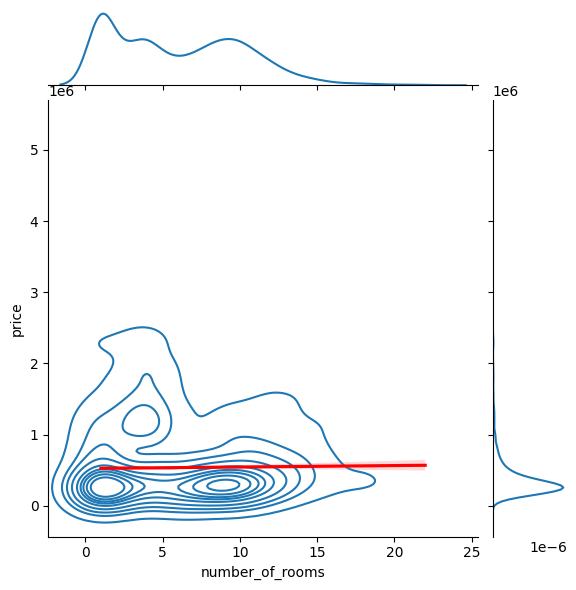

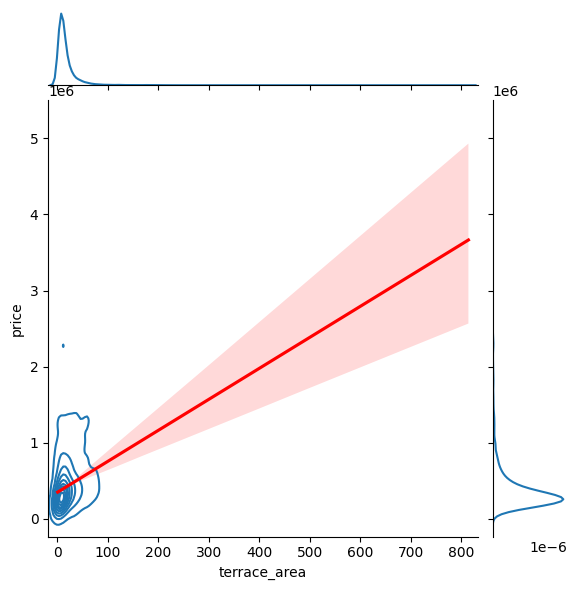

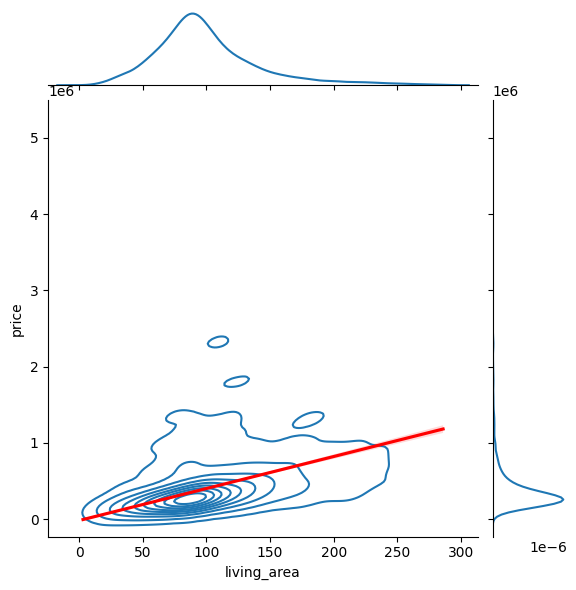

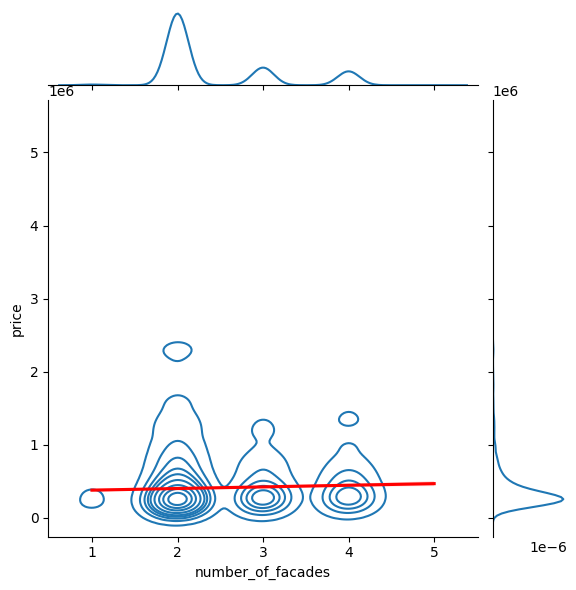

In [63]:
import seaborn as sns

for col in numeric:
    xdata, ydata = df_apt[col], df_apt["price"]
    sns.jointplot(x=xdata, y=ydata, kind="kde")
    sns.regplot(x=xdata, y=ydata, scatter=False, color="red")